In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline 

In [2]:
test=pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
train=pd.read_csv('train.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [6]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dict={}
for i in train.columns:
    dict[i]=train[i].value_counts().shape[0]
pd.DataFrame(dict,index=['unique']).transpose()

,unique
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


**Categorical Features**: Sex, Parch, Embarked

**Ordinal Features**: Pclass

**Continous Features**: age, fare

**Discrete Feature**: SibSip

**Target Feature**: Survived

**categorical feature= sex,parch,embarked,pclass,sibsp,survived

**continous feature=age,fare

In [9]:
import seaborn as sns

c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

[Text(0.5, 0, 'Pclass')]

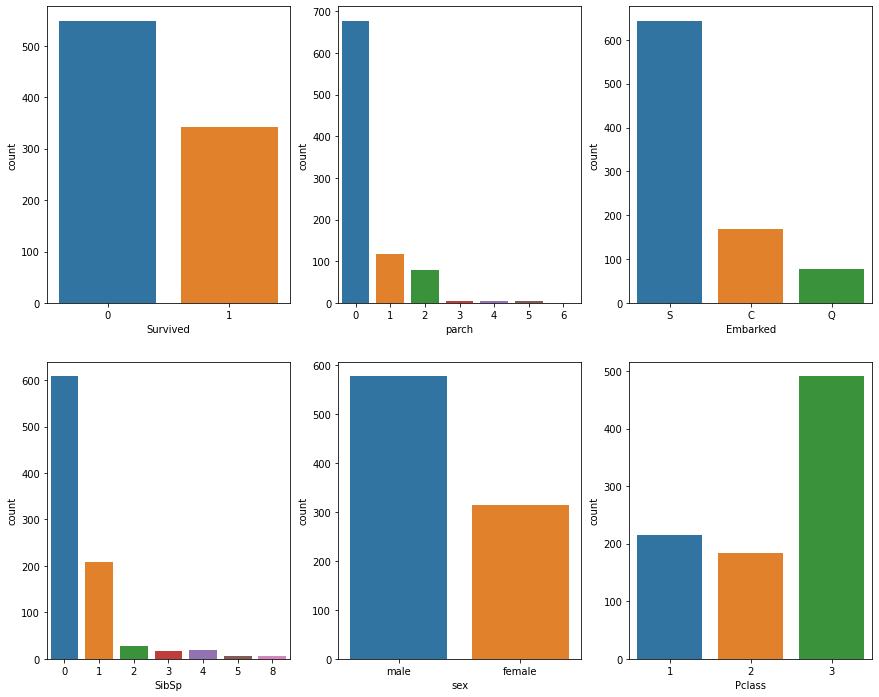

In [10]:
# ** categorical features plots**
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,4)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

sns.countplot('Survived', data=train, ax=ax0).set(xlabel='Survived')
sns.countplot('Parch', data=train, ax=ax1).set(xlabel='parch')
sns.countplot('Embarked', data=train, ax=ax2).set(xlabel='Embarked')
sns.countplot('SibSp', data=train, ax=ax3).set(xlabel='SibSp')
sns.countplot('Sex', data=train, ax=ax4).set(xlabel='sex')
sns.countplot('Pclass', data=train, ax=ax5).set(xlabel='Pclass')



Text(180, 0.0232, 'Age curve is seems likely to have guassian curve whereas Fare curve isnt a guassian curve so we need to transform')

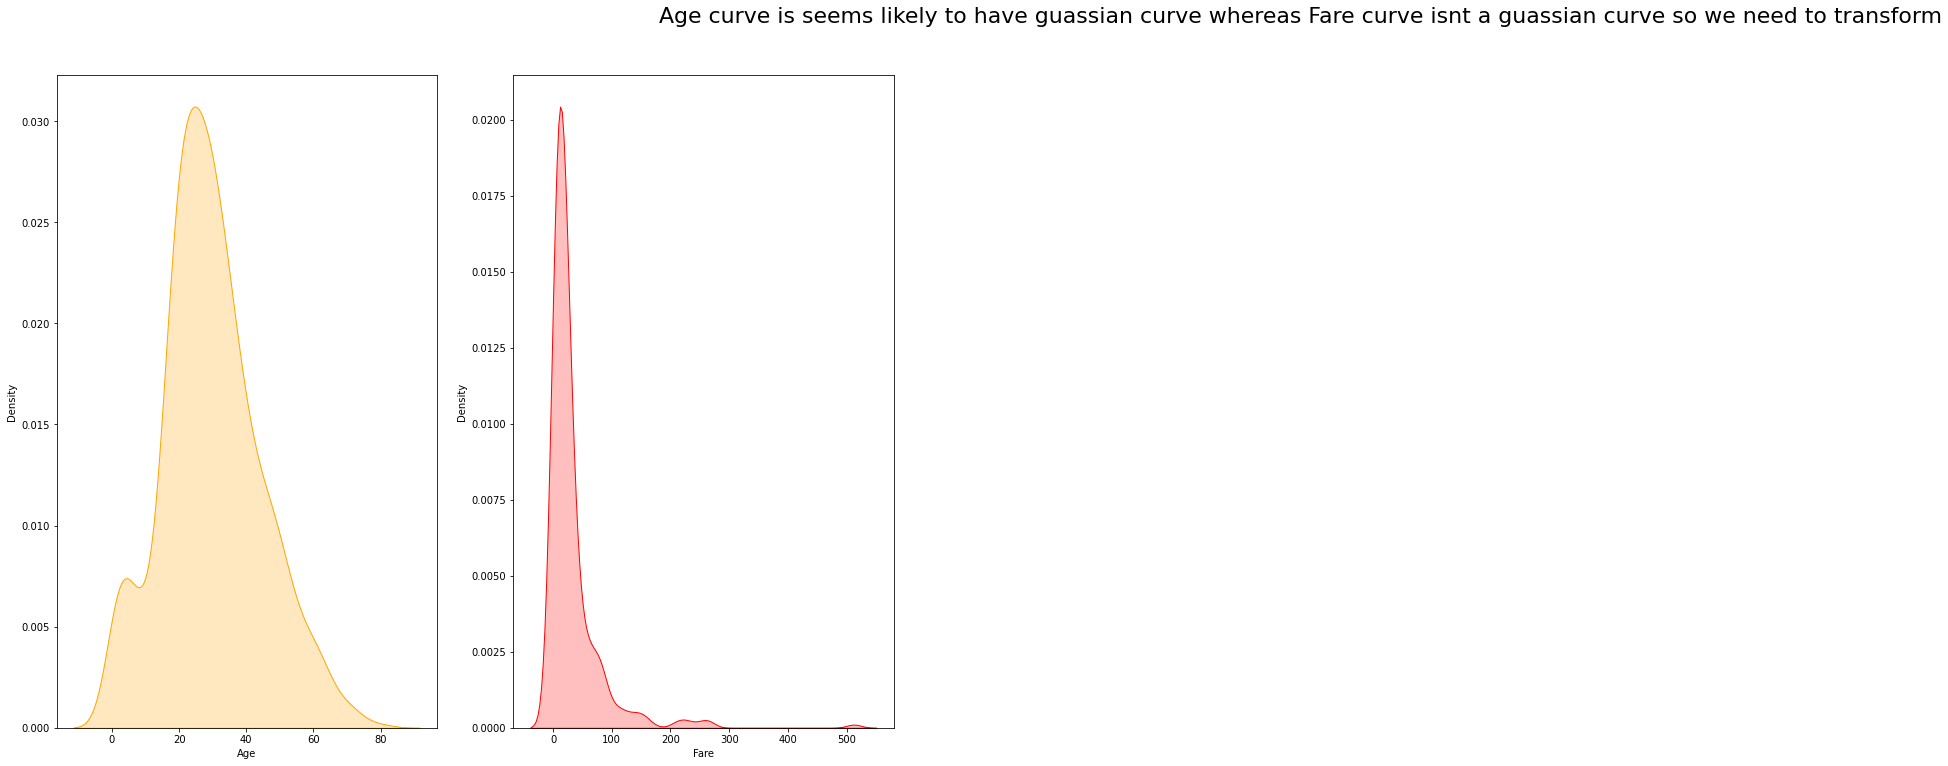

In [11]:
# **continous plot**
fig=plt.figure(figsize=(15,12))
gs=fig.add_gridspec(1,2)
axA=fig.add_subplot(gs[0,0])
axB=fig.add_subplot(gs[0,1])

sns.kdeplot(train['Age'],data=train,ax=axA,fill=True,color='orange').set(xlabel='Age')
sns.kdeplot(train['Fare'],data=train,ax=axB,fill=True,color='red').set(xlabel='Fare')
plt.text(180, 0.0232,'Age curve is seems likely to have guassian curve whereas Fare curve isnt a guassian curve so we need to transform',fontsize='22')

**Univariate Analysis with respect to Survived Column(Target)**

c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

[Text(0.5, 0, 'sibsp')]

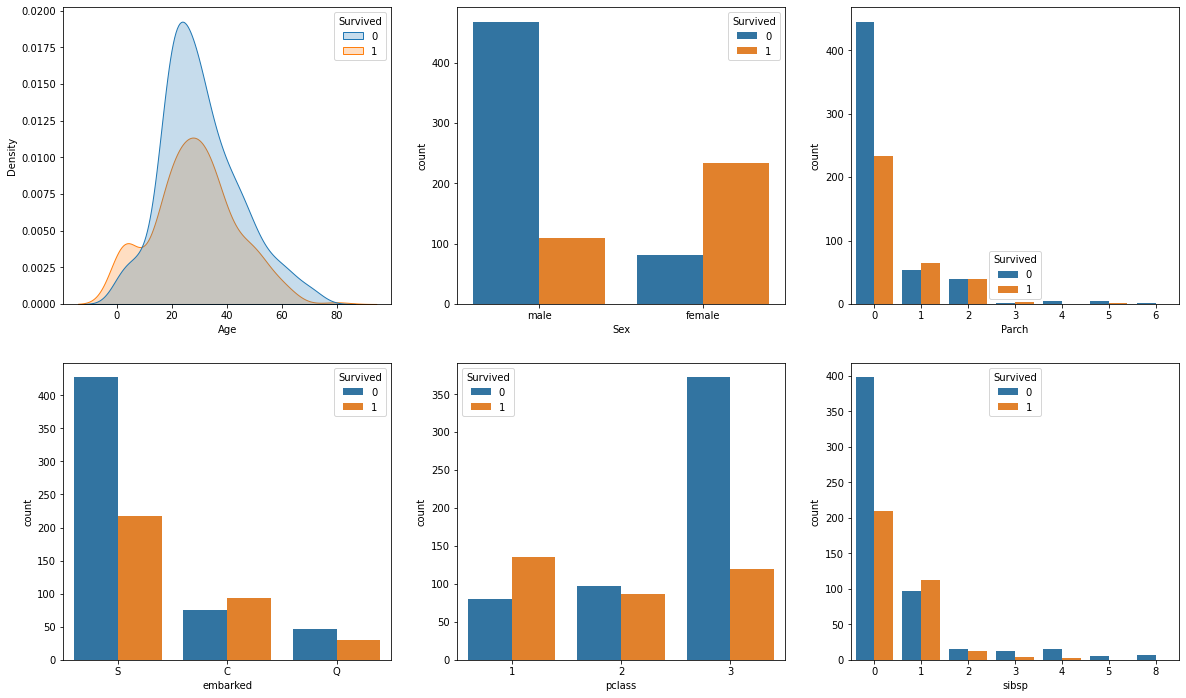

In [12]:
# blue is died and yellow is lived
fig=plt.figure(figsize=(20,12))
gs=fig.add_gridspec(2,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[1,2])

sns.kdeplot(train['Age'],data=train,hue='Survived',ax=ax0,fill=True,color='red').set(xlabel='Age')
sns.countplot('Sex',data=train,hue='Survived',ax=ax1).set(xlabel='Sex')
sns.countplot('Parch',data=train,hue='Survived',ax=ax2).set(xlabel='Parch')
sns.countplot('Embarked',data=train,hue='Survived',ax=ax3).set(xlabel='embarked')
sns.countplot('Pclass',data=train,hue='Survived',ax=ax4).set(xlabel='pclass')
sns.countplot('SibSp',data=train,hue='Survived',ax=ax5).set(xlabel='sibsp')

<AxesSubplot:>

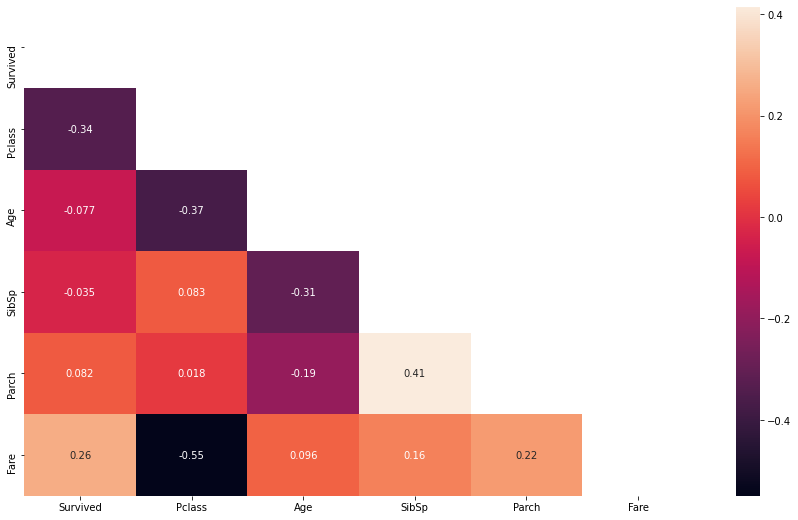

In [13]:
# for heatmap withour confusion matrix we use this special feature which is .corr()
matrix=np.triu(train.corr()) # for half heatmap we use np.triu and use mask inside heatmap
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True,mask=matrix)

**heatmap helps to corelate the features with each other**

**Pclass has a good negative correlation with Fare. Its kinda obvious that as Pclass increases Fare will decrease(Third Class will cost less than First class).**

**Fare also has minor positive correlation with Survived. Again people who paid more had more chances of survival.**

**SibSp has good positive correlation with Parch. We can concatenate these together into a single family column later on**

<AxesSubplot:xlabel='Sex', ylabel='Age'>

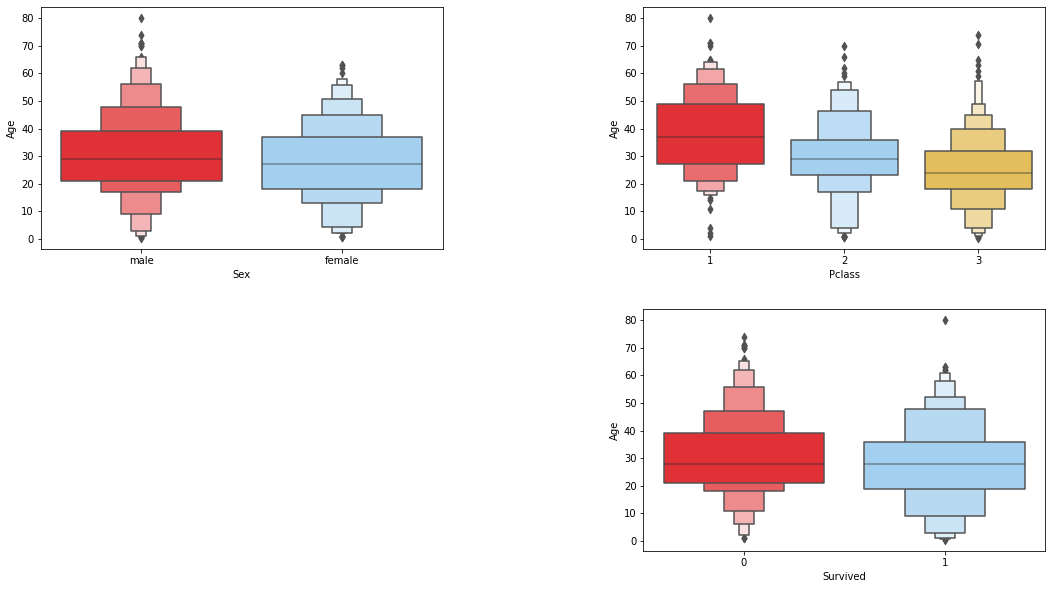

In [14]:
fig = plt.figure(figsize=(18,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
axC = fig.add_subplot(gs[0,0])
# axD = fig.add_subplot(gs[1,0])
axA = fig.add_subplot(gs[0,1])
axB = fig.add_subplot(gs[1,1])

sns.boxenplot(x="Pclass",y="Age",data=train, palette=['#FD151B' ,'#97D2FB' ,'#F9C846' ,'#437F97'], ax=axA)

sns.boxenplot(x="Survived",y="Age",data=train, palette=['#FD151B' ,'#97D2FB' ,'#F9C846' ,'#437F97'], ax=axB)

sns.boxenplot(x='Sex',y='Age',data=train,palette=['#FD151B' ,'#97D2FB' ,'#F9C846' ,'#437F97'],ax=axC)


**Pclass 1 had people mostly had people aged between 30 and 50 years. It might be because the more aged people might have better jobs and finances to afford first class.**

**Pclass 2 had people aged between 20-40 more**

**Pclass 3 had more people age between 20-30**

**Age column has significant outliers as observed from the plots**

**Sex columns has significant outliers as observed from the plots**

In [15]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
dict={}
for i in test.columns:
    dict[i]=test[i].value_counts().shape[0]
pd.DataFrame(dict,index=['unique']).transpose()

,unique
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
test.drop(['PassengerId','Ticket','Cabin','Name'],axis='columns',inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

[Text(0.5, 0, 'Pclass')]

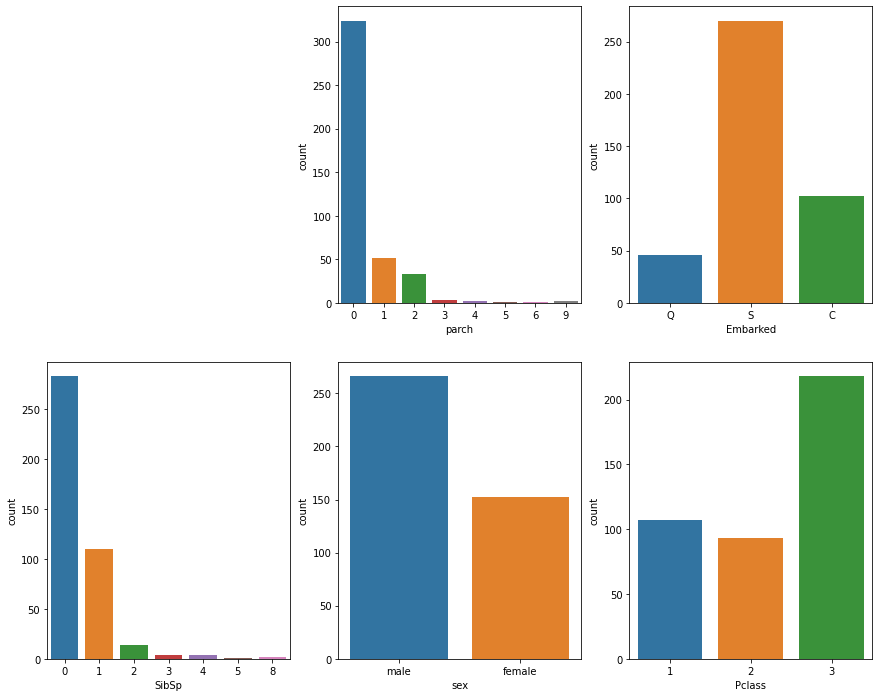

In [20]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,4)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

sns.countplot('Parch', data=test, ax=ax1).set(xlabel='parch')
sns.countplot('Embarked', data=test, ax=ax2).set(xlabel='Embarked')
sns.countplot('SibSp', data=test, ax=ax3).set(xlabel='SibSp')
sns.countplot('Sex', data=test, ax=ax4).set(xlabel='sex')
sns.countplot('Pclass', data=test, ax=ax5).set(xlabel='Pclass')



Text(180, 0.0232, 'Age curve is seems likely to have guassian curve whereas Fare curve isnt a guassian curve so we need to transform')

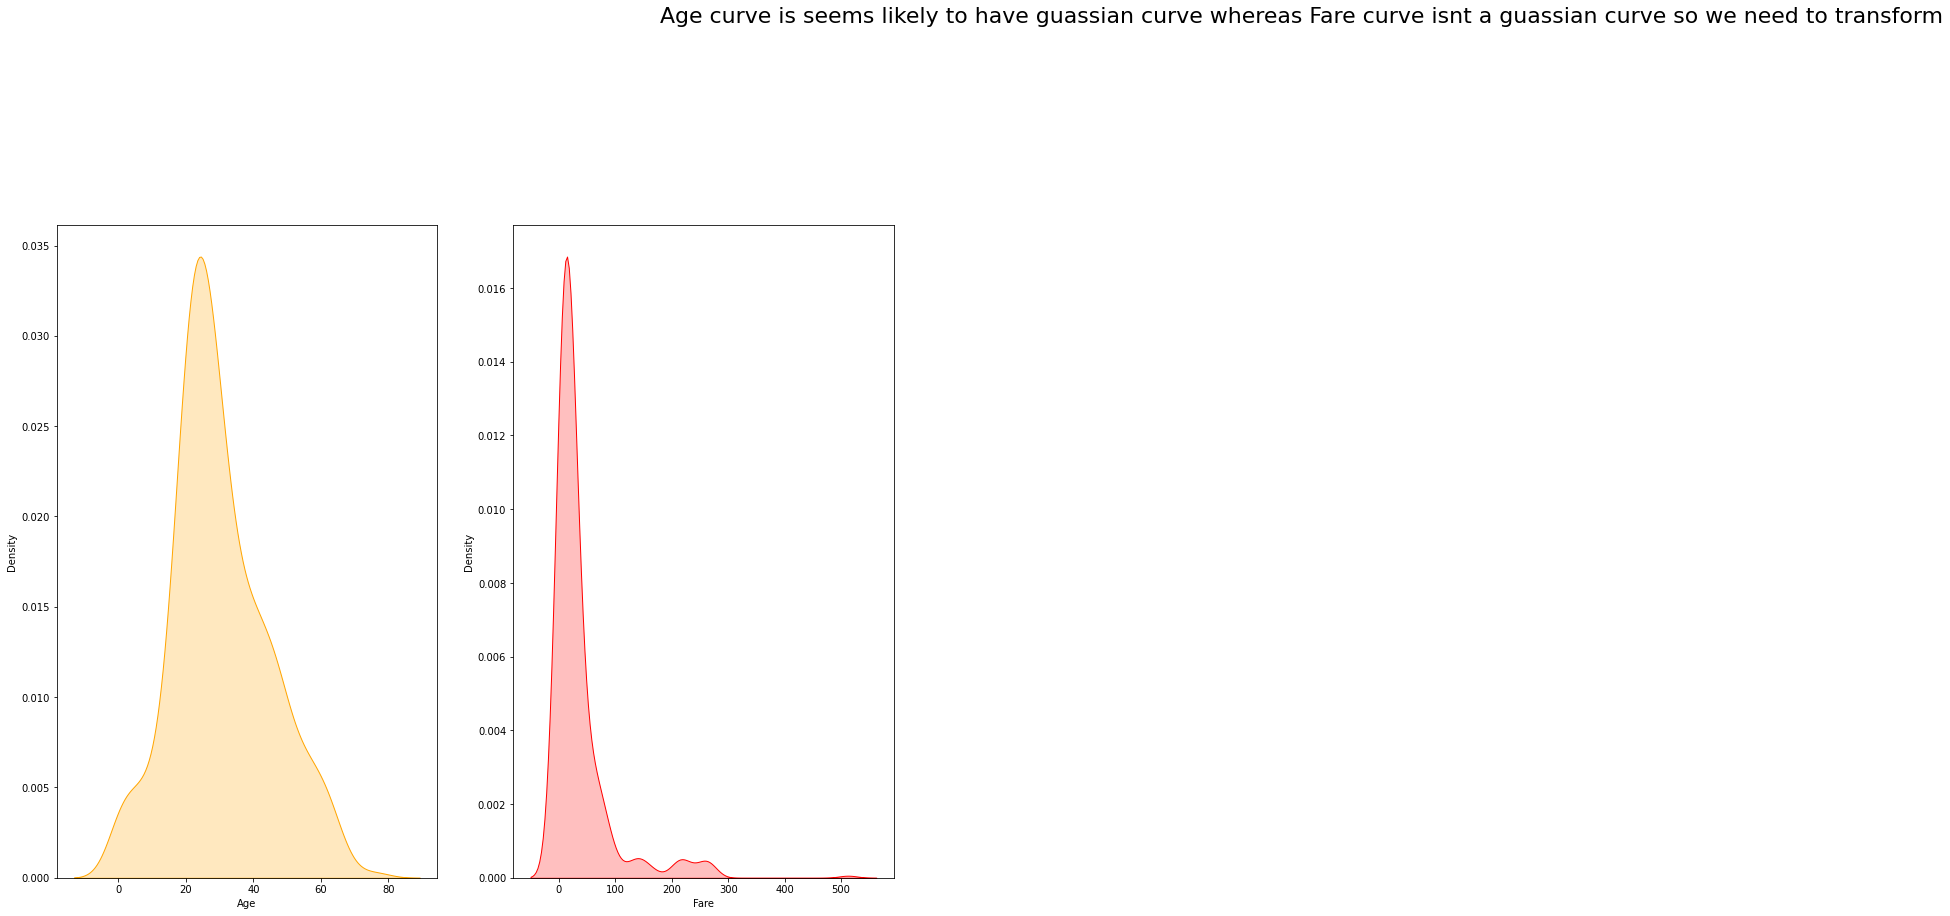

In [21]:
fig=plt.figure(figsize=(15,12))
gs=fig.add_gridspec(1,2)
axA=fig.add_subplot(gs[0,0])
axB=fig.add_subplot(gs[0,1])

sns.kdeplot(test['Age'],data=test,ax=axA,fill=True,color='orange').set(xlabel='Age')
sns.kdeplot(test['Fare'],data=test,ax=axB,fill=True,color='red').set(xlabel='Fare')
plt.text(180, 0.0232,'Age curve is seems likely to have guassian curve whereas Fare curve isnt a guassian curve so we need to transform',fontsize='22')

In [22]:
print('training data')
print('median age for people who are in first class',train[train['Pclass']==1]['Age'].median())
print('median age for people who are in second class',train[train['Pclass']==2]['Age'].median())
print('median age for people who are in third class',train[train['Pclass']==3]['Age'].median())

training data
median age for people who are in first class 37.0
median age for people who are in second class 29.0
median age for people who are in third class 24.0


In [23]:
print('testing data')
print('median age for people who are in first class',test[test['Pclass']==1]['Age'].median())
print('median age for people who are in second class',test[test['Pclass']==2]['Age'].median())
print('median age for people who are in third class',test[test['Pclass']==3]['Age'].median())

testing data
median age for people who are in first class 42.0
median age for people who are in second class 26.5
median age for people who are in third class 24.0


In [24]:
def input_age_train(columns):
    Age=columns[0]
    Pclass=columns[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [25]:
train['Age']=train[['Age','Pclass']].apply(input_age_train,axis=1)

In [26]:
def input_age_test(columns):
    Age=columns[0]
    Pclass=columns[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [27]:
test['Age']=test[['Age','Pclass']].apply(input_age_test,axis=1)

In [28]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [30]:
print('median of S class is ',test[test['Pclass']==3]['Fare'].mean())

median of S class is  12.459677880184334


In [31]:
test['Fare']=test['Fare'].fillna(12.46)

In [32]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

[Text(0.5, 0, 'train_fare')]

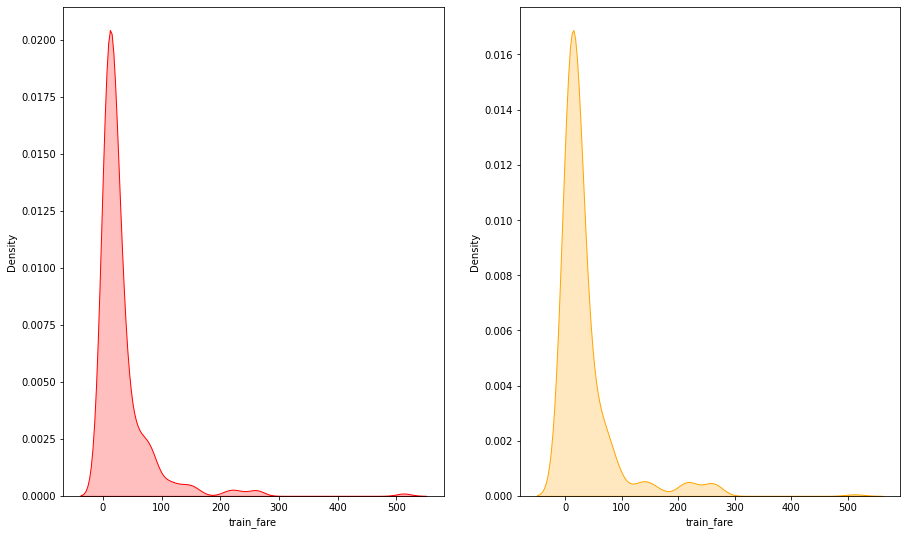

In [33]:
fig=plt.figure(figsize=(15,9))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

sns.kdeplot(train['Fare'],data=train,ax=ax0,fill=True,color='red').set(xlabel='train_fare')
sns.kdeplot(test['Fare'],data=test,ax=ax1,fill=True,color='orange').set(xlabel='train_fare')


In [34]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

[Text(0.5, 0, 'train_fare')]

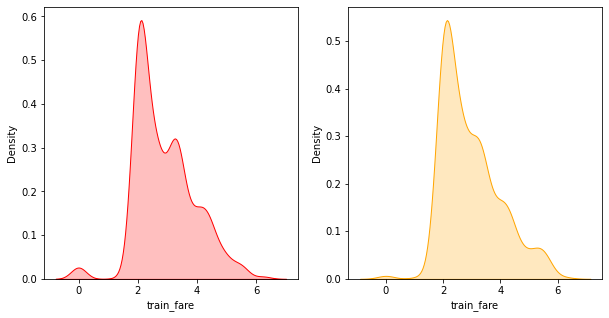

In [35]:
fig=plt.figure(figsize=(10,5))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

sns.kdeplot(train['Fare'],data=train,ax=ax0,fill=True,color='red').set(xlabel='train_fare')
sns.kdeplot(test['Fare'],data=test,ax=ax1,fill=True,color='orange').set(xlabel='train_fare')

In [36]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,2.057860,Q
1,3,female,47.0,1,0,1.945910,S
2,2,male,62.0,0,0,2.270836,Q
3,3,male,27.0,0,0,2.159003,S
4,3,female,22.0,1,1,2.508582,S


In [37]:
test['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [38]:
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [39]:
test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [40]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

**binning age column which means if we bine Age column with survived we will get the range wise destribution of died and srvived**

In [41]:
train['Age']=pd.qcut(train['Age'],10,duplicates='drop')
test['Age']=pd.qcut(test['Age'],10,duplicates='drop')

c:\users\shardul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Age wrt survived')]

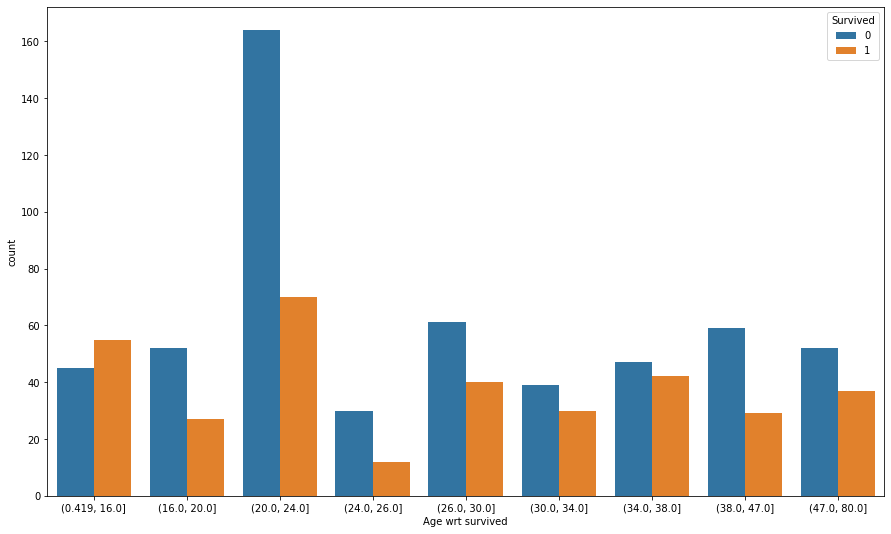

In [46]:
fig=plt.figure(figsize=(15,9))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])

sns.countplot(train['Age'],data=train,hue='Survived',ax=ax0).set(xlabel='Age wrt survived')

**people in range 20-24 of Age survived and died the most**

## adding sibsp and parch in one column (family size)

In [47]:
train['familysize']=train['SibSp']+train['Parch']+1
test['familysize']=test['SibSp']+test['Parch']+1

In [49]:
train.loc[(train['familysize']==1),'familysize']=0 #alone
train.loc[(train['familysize']>1) & (train['familysize']<=4),'familysize']=1 #samllfamily
train.loc[(train['familysize']>4) & (train['familysize']<=6),'familysize']=2 #mediumfsmily
train.loc[(train['familysize']>6),'familysize']=3 #largefsmily

In [50]:
test.loc[(test['familysize']==1),'familysize']=0 #alone
test.loc[(test['familysize']>1) & (test['familysize']<=4),'familysize']=1 #samllfamily
test.loc[(test['familysize']>4) & (test['familysize']<=6),'familysize']=2 #mediumfsmily
test.loc[(test['familysize']>6),'familysize']=3 #largefsmily

In [51]:
train.drop(['SibSp','Parch'],axis='columns',inplace=True)
test.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [52]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,familysize
0,0,3,male,"(20.0, 24.0]",1.981001,S,0
1,1,1,female,"(34.0, 38.0]",4.266662,C,0
2,1,3,female,"(24.0, 26.0]",2.070022,S,0
3,1,1,female,"(34.0, 38.0]",3.972177,S,0
4,0,3,male,"(34.0, 38.0]",2.085672,S,0


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
train['Age']=LabelEncoder().fit_transform(train['Age'])
test['Age']=LabelEncoder().fit_transform(test['Age'])

In [55]:
train.Age.head()

0    2
1    6
2    3
3    6
4    6
Name: Age, dtype: int32

In [56]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,familysize
0,0,3,male,2,1.981001,S,0
1,1,1,female,6,4.266662,C,0
2,1,3,female,3,2.070022,S,0
3,1,1,female,6,3.972177,S,0
4,0,3,male,6,2.085672,S,0


In [63]:
c=train[['Sex','Embarked']]
dummies=pd.get_dummies(c)
dummies.head(10)

,Sex_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,1
1,0,1,0,1,0,0
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,0,1,0,0,1
5,0,0,1,0,1,0
6,0,0,1,0,0,1
7,0,0,1,0,0,1
8,0,1,0,0,0,1
9,0,1,0,1,0,0


In [65]:
dummies.drop('Sex_3',axis=1,inplace=True)
dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [66]:
dummies1=pd.get_dummies(train['Pclass'])
dummies1.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [67]:
dummies2=pd.concat([dummies,dummies1],axis=1)
dummies2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,1,2,3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [74]:
dummies2.rename(columns={1:'Pclass_1',2:'Pclass_2',3:'Pclass_3'},inplace=True)

In [75]:
dummies2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [77]:
train_new=pd.concat([dummies2,train],axis=1)
train_new

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived,Pclass,Sex,Age,Fare,Embarked,familysize
0,0,1,0,0,1,0,0,1,0,3,male,2,1.981001,S,0
1,1,0,1,0,0,1,0,0,1,1,female,6,4.266662,C,0
2,1,0,0,0,1,0,0,1,1,3,female,3,2.070022,S,0
3,1,0,0,0,1,1,0,0,1,1,female,6,3.972177,S,0
4,0,1,0,0,1,0,0,1,0,3,male,6,2.085672,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0,0,2,male,4,2.564949,S,0
887,1,0,0,0,1,1,0,0,1,1,female,1,3.401197,S,0
888,1,0,0,0,1,0,0,1,0,3,female,2,3.154870,S,0
889,0,1,1,0,0,1,0,0,1,1,male,3,3.401197,C,0


In [79]:
train_new.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
train_new.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived,Age,Fare,familysize
0,0,1,0,0,1,0,0,1,0,2,1.981001,0
1,1,0,1,0,0,1,0,0,1,6,4.266662,0
2,1,0,0,0,1,0,0,1,1,3,2.070022,0
3,1,0,0,0,1,1,0,0,1,6,3.972177,0
4,0,1,0,0,1,0,0,1,0,6,2.085672,0


**preparing for data models**

In [80]:
from sklearn.model_selection import train_test_split
X=train_new.drop('Survived',axis=1)
y=train_new['Survived']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**LOgistic regression**

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8100558659217877

In [88]:
model1 = LogisticRegression(C= 0.09858667904100823,
 max_iter= 200,
 penalty= 'l2',
 solver= 'liblinear')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7988826815642458

**K-nearest neighbour**

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7653631284916201

In [93]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(knn.score(X_test,y_test))
# print(knn1.max())

0.7653631284916201
0.8044692737430168
0.7988826815642458
0.7821229050279329
0.8044692737430168
0.7877094972067039
0.8156424581005587
0.8044692737430168
0.8212290502793296
0.8100558659217877
0.8100558659217877
0.7932960893854749
0.7988826815642458
0.7932960893854749
0.7877094972067039
0.7932960893854749
0.7932960893854749
0.8044692737430168
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.7988826815642458
0.8100558659217877
0.8044692737430168
0.8100558659217877
0.8044692737430168
0.8100558659217877
0.8100558659217877
0.7653631284916201
0.7430167597765364
0.7430167597765364
0.7430167597765364
0.7374301675977654
0.7374301675977654


**RandomForest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8212290502793296

**SVM**

In [97]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7988826815642458